In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

In [100]:
df_primary = pd.read_csv("VA_Survey_Responses.csv")

In [102]:
df_primary.rename(columns={"challeneges" : "challenges"},inplace=True)
df_primary = df_primary[["How long","VA staff responsiveness","Satisfaction with VA’s online or phone scheduling system","challenges", "rural/urban"]]
df_primary.head()

,How long,VA staff responsiveness,Satisfaction with VA’s online or phone scheduling system,challenges,rural/urban
0,1-3 days,Sometimes,Very satisfied,None at the moment,Urban
1,More than 7 days,Most of the time,Neutral,The system is so back logged and nuanced that ...,Rural
2,More than 7 days,Never,Dissatisfied,NaN,Rural
3,More than 7 days,Rarely,Satisfied,"Denied authorizations, slow care, appointments...",Urban
4,More than 7 days,Rarely,Dissatisfied,NaN,Rural


In [105]:
scheduling_issues_keywords = ["phone", "online" , "schedule" , "referrals" , "telephone" , "app" , "scheduling"]
few_providers_keywords = ["specialists", "specialist" , "providers" , "lack","few"]

def categorize_challenges(challenges):
    if any(keyword in challenges.lower() for keyword in scheduling_issues_keywords):
        return "scheduling_issues"
    elif any(keyword in challenges.lower() for keyword in few_providers_keywords):
        return "few_providers"
    return "Other"

In [107]:
df_primary["challenge_category"] = df_primary["challenges"].apply(lambda x: categorize_challenges(x) if isinstance(x,str) else "Other")

In [109]:
df_primary.head()

,How long,VA staff responsiveness,Satisfaction with VA’s online or phone scheduling system,challenges,rural/urban,challenge_category
0,1-3 days,Sometimes,Very satisfied,None at the moment,Urban,Other
1,More than 7 days,Most of the time,Neutral,The system is so back logged and nuanced that ...,Rural,scheduling_issues
2,More than 7 days,Never,Dissatisfied,NaN,Rural,Other
3,More than 7 days,Rarely,Satisfied,"Denied authorizations, slow care, appointments...",Urban,scheduling_issues
4,More than 7 days,Rarely,Dissatisfied,NaN,Rural,Other


In [111]:
def join_categories(response):
    if response in ["Sometimes" , "Never" , "Rarely"]:
        return "Poor"
    elif response in ["Most of the time" , "Always"]:
        return "Good"
    return "Unknown"

df_primary["Satff_responsiveness"] = df_primary["VA staff responsiveness"].apply(lambda x: join_categories(x))
df_primary.head()

,How long,VA staff responsiveness,Satisfaction with VA’s online or phone scheduling system,challenges,rural/urban,challenge_category,Satff_responsiveness
0,1-3 days,Sometimes,Very satisfied,None at the moment,Urban,Other,Poor
1,More than 7 days,Most of the time,Neutral,The system is so back logged and nuanced that ...,Rural,scheduling_issues,Good
2,More than 7 days,Never,Dissatisfied,NaN,Rural,Other,Poor
3,More than 7 days,Rarely,Satisfied,"Denied authorizations, slow care, appointments...",Urban,scheduling_issues,Poor
4,More than 7 days,Rarely,Dissatisfied,NaN,Rural,Other,Poor


In [113]:
def satisfaction(response):
    if response in ["Satisfied", "Very satisfied"]:
        return "satisfied"
    elif response in ["Dissatisfied","Very dissatisfied"]:
        return "dissatisfied"
    elif response =="Neutral":
        return "neutral"
    return "Unknonwn"

df_primary["scheduling_satisfaction"] = df_primary["Satisfaction with VA’s online or phone scheduling system"].apply(satisfaction)
df_primary.columns

Index(['How long', 'VA staff responsiveness',
       'Satisfaction with VA’s online or phone scheduling system',
       'challenges', 'rural/urban', 'challenge_category',
       'Satff_responsiveness', 'scheduling_satisfaction'],
      dtype='object')

In [115]:
df_primary["How long"].unique()

array(['1-3 days', 'More than 7 days', '4-7 days'], dtype=object)

In [117]:
def time(response):
    if response in ["1-3 days", "4-7 days"]:
        return "short_wait_time"
    elif response == "More than 7 days":
        return "long_wait_time"
    return "Other"

df_primary["Wait_time"] = df_primary["How long"].apply(time)
df_primary.head()

,How long,VA staff responsiveness,Satisfaction with VA’s online or phone scheduling system,challenges,rural/urban,challenge_category,Satff_responsiveness,scheduling_satisfaction,Wait_time
0,1-3 days,Sometimes,Very satisfied,None at the moment,Urban,Other,Poor,satisfied,short_wait_time
1,More than 7 days,Most of the time,Neutral,The system is so back logged and nuanced that ...,Rural,scheduling_issues,Good,neutral,long_wait_time
2,More than 7 days,Never,Dissatisfied,NaN,Rural,Other,Poor,dissatisfied,long_wait_time
3,More than 7 days,Rarely,Satisfied,"Denied authorizations, slow care, appointments...",Urban,scheduling_issues,Poor,satisfied,long_wait_time
4,More than 7 days,Rarely,Dissatisfied,NaN,Rural,Other,Poor,dissatisfied,long_wait_time


In [119]:
df_primary.drop(columns=["How long", "challenge_category", "rural/urban", "Satisfaction with VA’s online or phone scheduling system","challenges","VA staff responsiveness"],inplace=True)

In [121]:
df_primary.rename(columns={"Satff_responsiveness" : "staff_responsiveness"},inplace=True)
print(df_primary.head())
df_primary.to_csv("transformed_survey_responses.csv",index=False)

  staff_responsiveness scheduling_satisfaction        Wait_time
0                 Poor               satisfied  short_wait_time
1                 Good                 neutral   long_wait_time
2                 Poor            dissatisfied   long_wait_time
3                 Poor               satisfied   long_wait_time
4                 Poor            dissatisfied   long_wait_time


Feature Importances:
                   Feature  Importance
0     staff_responsiveness    0.260392
1  scheduling_satisfaction    0.739608


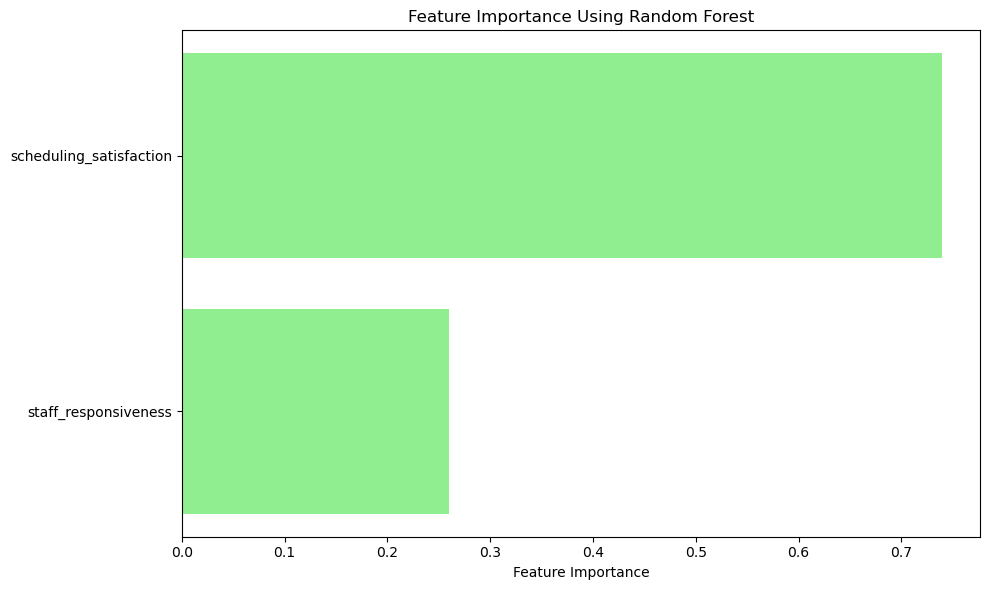

In [136]:
#Using Random Forest Classifier to check the most significant feature 

from sklearn.ensemble import RandomForestClassifier

label_encoder = LabelEncoder()


label_encoder_staff = LabelEncoder()
label_encoder_scheduling = LabelEncoder()
label_encoder_wait = LabelEncoder()

# Create feature matrix X by encoding each column separately
X = pd.DataFrame({
    'staff_responsiveness': label_encoder_staff.fit_transform(df_primary["staff_responsiveness"]),
    'scheduling_satisfaction': label_encoder_scheduling.fit_transform(df_primary["scheduling_satisfaction"])
})

# Encode target variable (single column)
y = label_encoder_wait.fit_transform(df_primary["Wait_time"])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to view the feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

print("Feature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Using Random Forest')
plt.tight_layout()
plt.show()

In [125]:
#It can be seen that "scheduling_satisfaction" is a much more important feature impacting wait times, than staff responsiveness.
#Let's further calculate the fetaure importance with the help of "XGBoost model"

In [138]:
pip install xgboost

In [143]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

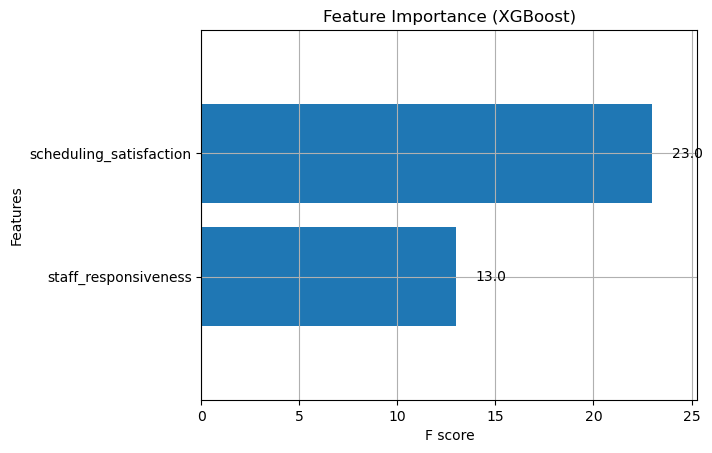

In [145]:
xg_model = xgb.XGBClassifier(random_state=0)

# Train the XGBoost model
xg_model.fit(X_train, y_train)

# Plot feature importance
xgb.plot_importance(xg_model, importance_type='weight', max_num_features=2, height=0.8)
plt.title('Feature Importance (XGBoost)')
plt.show()

In [130]:
#Therefore, we can confirm from our analysis that "schedluing issues" are the most importnat feature impacting appointment wait times.

In [147]:
print(importance_df)

                   Feature  Importance
0     staff_responsiveness    0.260392
1  scheduling_satisfaction    0.739608


In [181]:
importance_df.to_csv('importance_factors.csv', sep=',', encoding='utf-8', index=False)

In [183]:
from IPython.display import FileLink

In [185]:
FileLink("importance_factors.csv")

C:\Users\agarw\Desktop\UW_Classwork\IMT 570 Problem Solving\IMT570 Final Project all Data Analysis files\importance_factors.csv

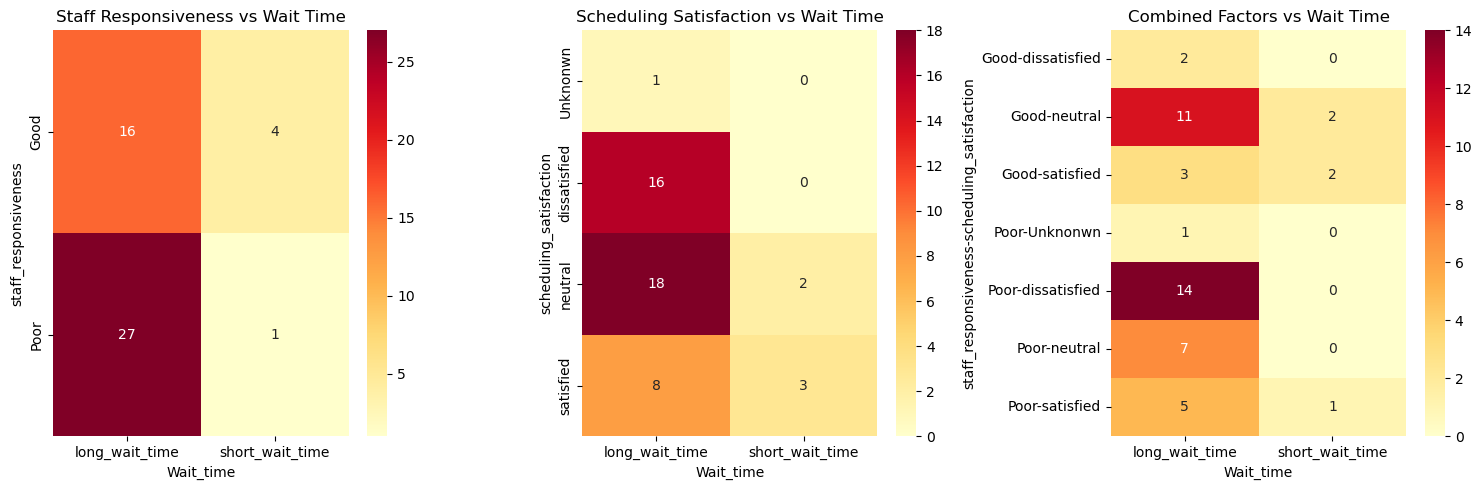


Percentage Analysis:

Staff Responsiveness Impact:
Wait_time             long_wait_time  short_wait_time
staff_responsiveness                                 
Good                       80.000000        20.000000
Poor                       96.428571         3.571429

Scheduling Satisfaction Impact:
Wait_time                long_wait_time  short_wait_time
scheduling_satisfaction                                 
Unknonwn                     100.000000         0.000000
dissatisfied                 100.000000         0.000000
neutral                       90.000000        10.000000
satisfied                     72.727273        27.272727


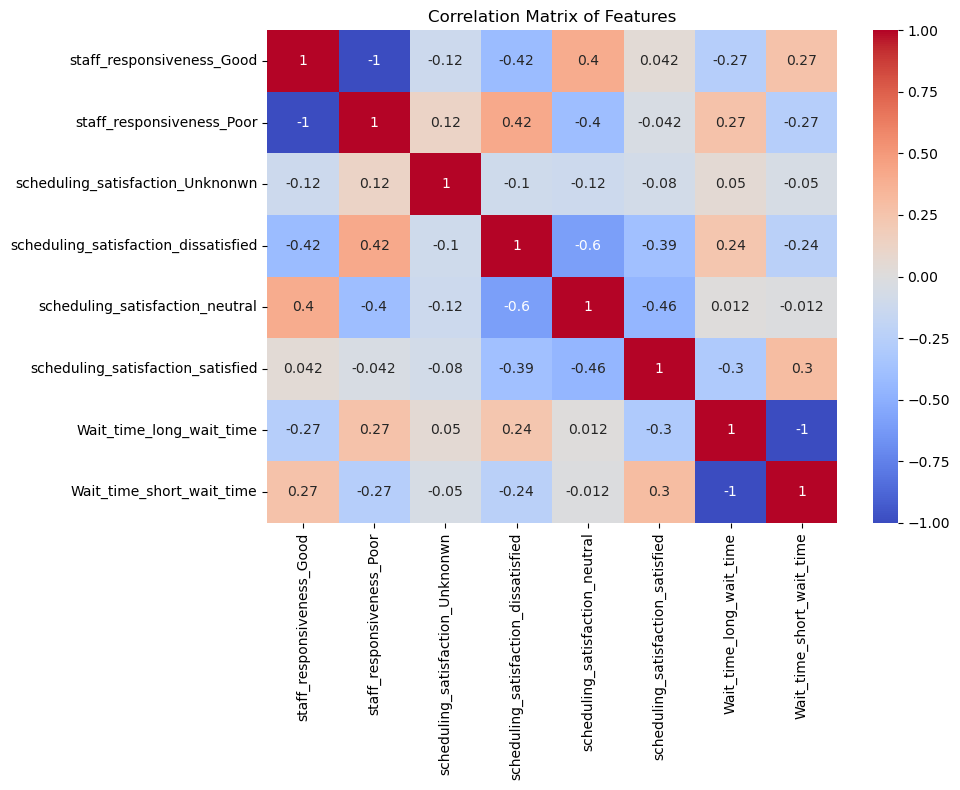

In [187]:
def analyze_wait_times(df):
    # Create contingency tables
    staff_wait_table = pd.crosstab(df['staff_responsiveness'], df['Wait_time'])
    sched_wait_table = pd.crosstab(df['scheduling_satisfaction'], df['Wait_time'])
    
    # Create combination analysis
    combined_analysis = pd.crosstab([df['staff_responsiveness'], df['scheduling_satisfaction']], 
                                  df['Wait_time'])
    
    # Plotting
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Staff Responsiveness vs Wait Time
    plt.subplot(131)
    sns.heatmap(staff_wait_table, annot=True, cmap='YlOrRd', fmt='d')
    plt.title('Staff Responsiveness vs Wait Time')
    
    # Plot 2: Scheduling Satisfaction vs Wait Time
    plt.subplot(132)
    sns.heatmap(sched_wait_table, annot=True, cmap='YlOrRd', fmt='d')
    plt.title('Scheduling Satisfaction vs Wait Time')
    
    # Plot 3: Combined Analysis
    plt.subplot(133)
    sns.heatmap(combined_analysis, annot=True, cmap='YlOrRd', fmt='d')
    plt.title('Combined Factors vs Wait Time')
    
    plt.tight_layout()
    plt.show()
    
    # Print percentages
    print("\nPercentage Analysis:")
    print("\nStaff Responsiveness Impact:")
    print(staff_wait_table.div(staff_wait_table.sum(axis=1), axis=0) * 100)
    
    print("\nScheduling Satisfaction Impact:")
    print(sched_wait_table.div(sched_wait_table.sum(axis=1), axis=0) * 100)

# Read the data
df = pd.read_csv('transformed_survey_responses.csv')

# Run the analysis
analyze_wait_times(df)

# Additional analysis for correlation
# Convert categorical variables to numeric
df_numeric = pd.get_dummies(df)

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()